## 3 - Regressão Logística

## Carrega base ex2data1.txt

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import pandas as pd

DATA_BASE = "am-T1-dados"

# 3.1 Visualiza¸c˜ao dos dados

def load_student_grade(properties_sell=DATA_BASE):
    os.makedirs(properties_sell, exist_ok=True)
    txt_path = os.path.join(properties_sell, "ex2data1.txt")
    return np.loadtxt(txt_path, delimiter=",")

## 3.1 - Visualização dos dados


Text(0, 0.5, 'Exam 2 Score')

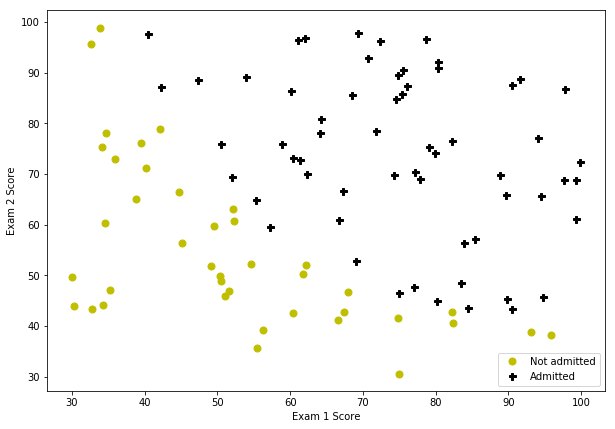

In [5]:

data = load_student_grade()


values = data[:,:2]
clasz  = data[:,2]

pos = data[np.where(clasz == 0)]
neg = data[np.where(clasz == 1)]

plt.figure(figsize=(10, 7))
plt.plot(pos[:,0], pos[:,1],'y.',marker='o',markersize=7, label="Not admitted");
plt.plot(neg[:,0], neg[:,1],'k.', marker='P',markersize=7, label="Admitted");
plt.legend(loc=4)
plt.xlabel("Exam 1 Score", fontsize=10)
plt.ylabel("Exam 2 Score", rotation=90, fontsize=10)

## 3.2 - Implementação

### 3.2.1 Função sigmoide

In [9]:

import numpy as np

def sigmoide(z):
    return 1 / (1 + np.exp(-z)) 

### 3.2.2 - Função de custo e gradiente

In [11]:
#3.2.2 Função de custo e gradiente
import numpy as np
import sigmoide as si


def funcaoCustoRegressaoLogistica(theta, z, labels_norm):
    y = labels_norm
    m = len(y)
    term_1 = y * np.transpose(np.log(sigmoide(np.dot(z,theta)))) 
    term_2 = (1-y)* np.transpose(np.log(1-sigmoide(np.dot(z,theta))))
    
    return - 1/m * (term_1 + term_2).sum()

#### A função de custo  utiliza a formula abaixo:
#### É necessário a função de sigmoide que coloca os valores dentro de um range de 0 e 1 onde se pode ober a probabilidade de uma classe ser identificada

![text](img/custo_l.png)   

#### O codigo do gradiente é refletido abaixo :

In [35]:
import numpy as np
import custo_reglog as cr
import sigmoide as si



def gd_reglog(theta,exam_norm,clasz):
    learning_rate = 0.5
    iter = 500
    y = clasz
    m = len(y)

    new_custo = 0

    for i in range(iter):   
        grad = (1./m) * np.dot(si.sigmoide( np.dot(exam_norm,theta) ).T - y, exam_norm).T 
        theta = theta - learning_rate * grad
        new_custo = funcaoCustoRegressaoLogistica(theta,exam_norm, clasz)
    return theta


![text](img/grad_log.png)   

### Onde a resolução da derivada é igual a :
![text](img/derivada.png)

In [22]:

def normalizar_caracteristicas(pmtr, labels):
    c = len(pmtr[0])
    l = len(pmtr)

    ll = len(labels)

    mean_label = np.zeros(shape=(ll), dtype=np.float64)
    std_label = np.zeros(shape=(ll), dtype=np.float64)

    normalizar_label = np.copy(labels)

    mean_lb = np.mean(labels)
    std_lb = np.std(labels)

    for j in range(ll):
        normalizar_label[j] = ((labels[j] - mean_lb) / std_lb)
        
    mean = np.zeros(shape=(c), dtype=np.float64)
    std = np.zeros(shape=(c), dtype=np.float64)

    normalizar = np.copy(pmtr)

    for j in range(c):
        mean[j] = np.mean(pmtr[:,j])
        std[j] = pmtr[:,j].std()

    for i in range(l):
        for j in range(c):
            normalizar[i,j] = ((pmtr[i,j] - mean[j]) / std[j])
            
    return normalizar,normalizar_label, mean , std,mean_lb,std_lb


In [29]:
student_grade = load_student_grade()
learning_rate = 1

initial_theta = np.array([0, 0, 0],ndmin=2)

values = student_grade[:,:2]
clasz  = student_grade[:,2]

m = len(clasz)
examData_norm,label_norm,mean_examData, std_examData,mean_lb,std_lb = normalizar_caracteristicas(values,clasz)

examData_norm = np.column_stack((np.ones((m,1)), examData_norm))
initial_theta = np.transpose(initial_theta)
J = funcaoCustoRegressaoLogistica(initial_theta, examData_norm,clasz)
theta  = gd_reglog(initial_theta,examData_norm,clasz)


In [30]:
J

0.6931471805599453

## 3.2.3 Aprendizado dos parâmetros

In [36]:
import scipy.optimize as opt

myargs=(examData_norm, clasz)
initial_theta = np.array([0, 0, 0],ndmin=2)
result = opt.fmin_tnc(func=funcaoCustoRegressaoLogistica, x0=initial_theta, fprime=gd_reglog, args=myargs)
custo  = funcaoCustoRegressaoLogistica(result[0], examData_norm, clasz)

In [39]:
funcaoCustoRegressaoLogistica(result[0],examData_norm,clasz)

0.6931471805599453

## 3.2.4 - Avaliação do modelo

In [41]:
import numpy as np
import sigmoide as si


def acuracia(theta, X):
    m = X.shape[0] 
    p = np.zeros((m, 1))
    sigValue = si.sigmoide( np.dot(X,theta) )
    p = sigValue >= 0.5
    return p

def predizer(values,theta):
    prob = si.sigmoide(np.dot(values,theta))
    return prob

In [45]:
p = predizer(np.array([1,45,85]),theta)
a = acuracia(theta, examData_norm)
print('Predizer {0}'.format(p))
print('Acuracia {0}'.format(np.mean(p == clasz) * 100))

Predizer [1.]
Acuracia 60.0
